In [356]:
import pandas as pd

fn = r'C:\Users\zerot\Desktop\python\tistory\chall_item\chal_item.csv'
df = pd.read_csv(fn, encoding='utf-8')

In [357]:
df = df.sort_values('date').reset_index(drop=True)

In [358]:
col_names = df.columns.tolist()[1:]

In [359]:
df['date']

0     2025-06-26
1     2025-06-27
2     2025-06-28
3     2025-06-29
4     2025-06-30
5     2025-07-01
6     2025-07-02
7     2025-07-03
8     2025-07-04
9     2025-07-05
10    2025-07-06
11    2025-07-07
12    2025-07-08
13    2025-07-09
14    2025-07-10
15    2025-07-11
16    2025-07-12
17    2025-07-13
18    2025-07-14
19    2025-07-15
20    2025-07-16
21    2025-07-17
22    2025-07-18
23    2025-07-19
24    2025-07-20
25    2025-07-21
26    2025-07-22
27    2025-07-23
Name: date, dtype: object

In [360]:
df['date'] = pd.to_datetime(df['date'])

In [292]:
import numpy as np

In [361]:
cond1 = (df['date'] >= '2025-06-30') & (df['date'] <= '2025-07-03')
cond2 = (df['date'] >= '2025-07-21') & (df['date'] < '2025-07-24')
aa = []
bb = []
for name in col_names:
    aa.append(name)
    bb.append(100-np.nanmean(df[name][cond2])/np.nanmean(df[name][cond1])*100)
    # print(name, np.nanmean(df[name][cond2])/np.nanmean(df[name][cond1])*100)

C:\Users\zerot\AppData\Local\Temp\ipykernel_15264\710878585.py:7: RuntimeWarning: Mean of empty slice
  bb.append(100-np.nanmean(df[name][cond2])/np.nanmean(df[name][cond1])*100)


In [362]:
dddd = pd.DataFrame({'name': aa, 'down': bb})

In [363]:
dddd = dddd.sort_values('down', ascending=False)

In [364]:

import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [192]:
color_dict = {
    '창뱃': '#dd0000',
    '미트라': '#c5ad61',
    '마도서': '#560b6b',
    '고근': '#88cc11',
    '거공': '#544C5C',
    '몽벨': '#990033',
    '마깃안': '#654754',
    '루컨마': '#FFCC99',
    '커포링':'#837A5D',
    '블랙하트': '#3300AA',
    '데브팬': '#DDAA22',
    '도미': '#BB0000',
    '파풀마': '#0066FF',
    '트왈마': '#AAAADD',
    '가엔링': '#84A640',
    '블빈마': '#666666',
    '미트라 코젬': '#B47B15',
    '에스텔라': '#CC6600'
}

img_dict = {
    '창뱃': r'C:\Users\zerot\Desktop\python\tistory\chall_item\changbet.png',
    '미트라': r'C:\Users\zerot\Desktop\python\tistory\chall_item\mitra.webp',
    '마도서': r'C:\Users\zerot\Desktop\python\tistory\chall_item\madoseo.webp',
    '고근': r'C:\Users\zerot\Desktop\python\tistory\chall_item\gogeun.png',
    '거공': r'C:\Users\zerot\Desktop\python\tistory\chall_item\geogong.webp',
    '몽벨': r'C:\Users\zerot\Desktop\python\tistory\chall_item\mongbel.png',
    '마깃안': r'C:\Users\zerot\Desktop\python\tistory\chall_item\magit.webp',
    '루컨마': r'C:\Users\zerot\Desktop\python\tistory\chall_item\luconma.png',
    '커포링': r'C:\Users\zerot\Desktop\python\tistory\chall_item\comfor.webp',
    '블랙하트': r'C:\Users\zerot\Desktop\python\tistory\chall_item\blackheart.png',
    '데브팬': r'C:\Users\zerot\Desktop\python\tistory\chall_item\daybreak.png',
    '도미': r'C:\Users\zerot\Desktop\python\tistory\chall_item\domi.png',
    '파풀마': r'C:\Users\zerot\Desktop\python\tistory\chall_item\papul.png',
    '트왈마': r'C:\Users\zerot\Desktop\python\tistory\chall_item\twil.png',
    '가엔링': r'C:\Users\zerot\Desktop\python\tistory\chall_item\gaen.png',
    '블빈마': r'C:\Users\zerot\Desktop\python\tistory\chall_item\blackbin.png',
    '미트라 코젬': r'C:\Users\zerot\Desktop\python\tistory\chall_item\mitragem.png',
    '에스텔라': r'C:\Users\zerot\Desktop\python\tistory\chall_item\estel.png'
}

In [247]:
offset_dict = { # x0 x1 y0 y1
    '고근': (0, 0, 0, 2.3),
    '거공': (0, 0, 1.5, 1.8),
    '몽벨': (0, 0, -1.5, 1),
    '커포링': (0, 0, 1.5, -0.5),
    '마깃안': (0, 0, -1.5, 0.5),
    '블랙하트': (0,0 ,0, 0),
    '데브팬': (0, 0, 0, -2.5),
    '도미': (0, 0, 0, 0.3),
    '파풀마': (0, 0, -0.2, -0.3),
    '미트라 코젬': (0, 0, 0, 0.3),
    '에스텔라': (0, 0, 0.3, 0),
    '블빈마': (0, 0, 0, -0.4),
    '트왈마': (0 ,0, 0, 0.3),
    '가엔링': (0, 0.6, 0, 0.3)
}

In [205]:
import numpy as np
def draw_line(df, name, ax):
    yy = df[name]
    xx = range(len(df['date']))
    yy_interp = df[name].interpolate()
    ax.plot(xx, yy_interp, color=color_dict[name])
    ax.plot(xx, yy, marker='o', color=color_dict[name], markeredgecolor='black')
    
    if name in offset_dict:
        x0, x1, y0, y1 = offset_dict[name]
    else:
        x0, x1, y0, y1 = 0, 0, 0, 0

    idx = np.argmax(~np.isnan(yy_interp))
    img = mpimg.imread(img_dict[name])
    imagebox = OffsetImage(img, zoom=0.5)  # zoom으로 크기 조절
    ab = AnnotationBbox(imagebox, (idx-0.6 + x0, np.nanmax(yy_interp.values[idx]) + y0),  # x=105% 오른쪽, y=50% 중간
                        
                        frameon=False)
    ax.add_artist(ab)

    mask = ~np.isnan(yy_interp)

    if np.any(mask):
        idx = np.where(mask)[0][-1]  # 마지막 True 인덱스
    else:
        idx = None  # 또는 raise 에러 등 처리
    
    img = mpimg.imread(img_dict[name])
    imagebox = OffsetImage(img, zoom=0.5)  # zoom으로 크기 조절
    ab = AnnotationBbox(imagebox, (idx+0.6 + x1, np.nanmax(yy_interp.values[idx]) + y1),  # x=105% 오른쪽, y=50% 중간
                        
                        frameon=False)
    ax.add_artist(ab)




In [ ]:
dd = pd.DataFrame({'name': df.iloc[-1].index.tolist()[1:],
                   'value': df.iloc[-1].values.tolist()[1:] })

In [194]:
import matplotlib.font_manager as fm


fn_font = r'C:\Users\zerot\Desktop\python\maple_API\MaplestoryFont_TTF\Maplestory Light.ttf' 
fontprop = fm.FontProperties(fname=fn_font, size=12)


Text(0.5, 1.0, '챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n창뱃, 미분')

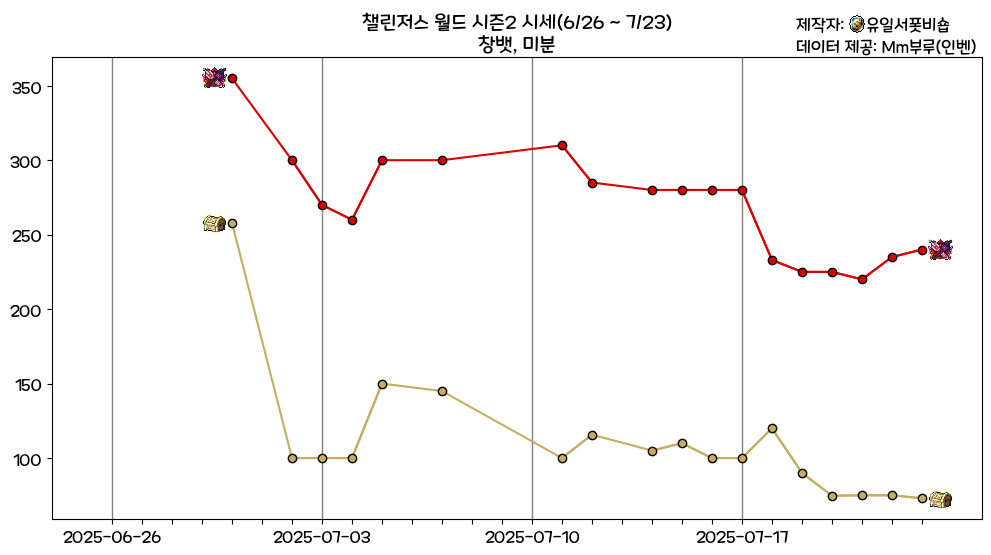

In [280]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
xx_labels = df['date'];
xx = range(len(df['date']));
for x in range(0, len(xx), 7):
    ax.axvline(xx[x], lw=1, color='gray')
# ax.plot(xx, yy)
for col_name in ['창뱃', '미트라']:
    draw_line(df, col_name, ax)


ax.set_xlim(-2 , 29);
ax.set_xticks(xx);
ax.set_xticklabels( [xx_labels[i] if i % 7 == 0 else '' for i in range(len(xx_labels))], fontproperties=fontprop);

fontprop = fm.FontProperties(fname=fn_font, size=12)
fontprop_title = fm.FontProperties(fname=fn_font, size=14)

ax.set_yticks(range(100, 351, 50));
ax.set_yticklabels(range(100, 351, 50), fontproperties=fontprop);

fontprop = fm.FontProperties(fname=fn_font, size=12)
fontprop_title = fm.FontProperties(fname=fn_font, size=14)

img = mpimg.imread(r'C:\Users\zerot\Desktop\python\maple_API\data\server_img\scania.png')
imagebox = OffsetImage(img, zoom=0.70)  # zoom으로 크기 조절
ab = AnnotationBbox(imagebox, (0.865, 1.071),  # x=105% 오른쪽, y=50% 중간
                    xycoords='axes fraction',
                    frameon=False)
ax.add_artist(ab)
ax.text(0.80, 1.07, "제작자:     유일서폿비숍", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);
ax.text(0.80, 1.02, "데이터 제공: Mm부루(인벤)", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);

ax.set_title(f'챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n창뱃, 미분', fontproperties=fontprop_title)

Text(0.5, 1.0, '챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n마도서, 고근, 거공, 몽벨, 루컨마, 마깃안, 커포링, 블랙하트, 데브팬')

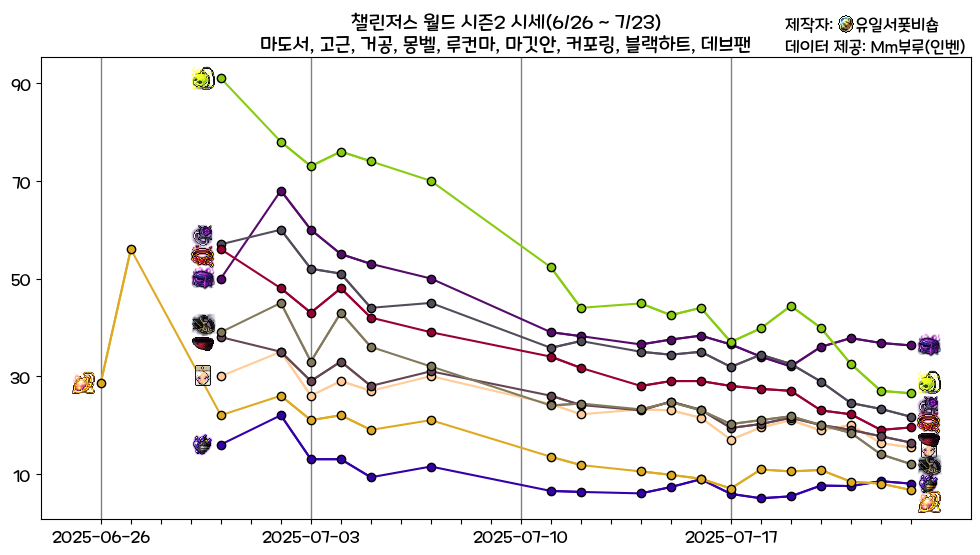

In [279]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
xx_labels = df['date'];
xx = range(len(df['date']));
for x in range(0, len(xx), 7):
    ax.axvline(xx[x], lw=1, color='gray')

# ax.plot(xx, yy)
for col_name in ['마도서', '고근', '거공', '몽벨', '루컨마','마깃안', '커포링', '블랙하트', '데브팬']:
    draw_line(df, col_name, ax)


ax.set_xlim(-2 , 29);
ax.set_xticks(xx);
ax.set_xticklabels( [xx_labels[i] if i % 7 == 0 else '' for i in range(len(xx_labels))], fontproperties=fontprop);
ax.set_yticks(range(10, 100, 20));
ax.set_yticklabels(range(10, 100, 20), fontproperties=fontprop);

fontprop = fm.FontProperties(fname=fn_font, size=12)
fontprop_title = fm.FontProperties(fname=fn_font, size=14)

img = mpimg.imread(r'C:\Users\zerot\Desktop\python\maple_API\data\server_img\scania.png')
imagebox = OffsetImage(img, zoom=0.70)  # zoom으로 크기 조절
ab = AnnotationBbox(imagebox, (0.865, 1.071),  # x=105% 오른쪽, y=50% 중간
                    xycoords='axes fraction',
                    frameon=False)
ax.add_artist(ab)
ax.text(0.80, 1.07, "제작자:     유일서폿비숍", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);
ax.text(0.80, 1.02, "데이터 제공: Mm부루(인벤)", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);

ax.set_title(f'챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n마도서, 고근, 거공, 몽벨, 루컨마, 마깃안, 커포링, 블랙하트, 데브팬', fontproperties=fontprop_title)

Text(0.5, 1.0, '챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n가엔링, 트왈마, 에스텔라, 파풀마, 블빈마, 도미, 미트라 코젬')

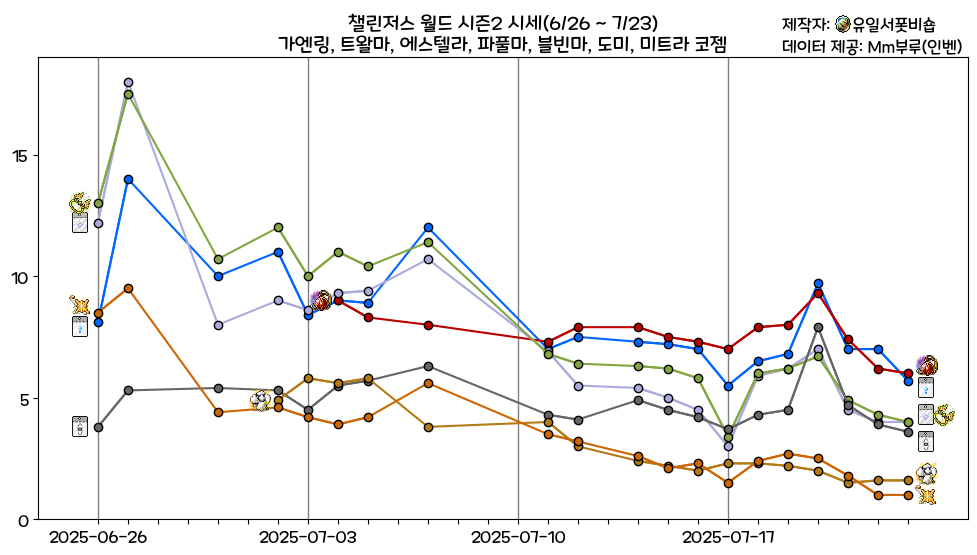

In [278]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
xx_labels = df['date'];
xx = range(len(df['date']));
for x in range(0, len(xx), 7):
    ax.axvline(xx[x], lw=1, color='gray')

# ax.plot(xx, yy)
for col_name in ['파풀마','도미', '트왈마', '가엔링', '블빈마', '미트라 코젬', '에스텔라']:
    draw_line(df, col_name, ax)


ax.set_xlim(-2 , 29);
ax.set_ylim(0 , 19);
ax.set_xticks(xx);
ax.set_xticklabels( [xx_labels[i] if i % 7 == 0 else '' for i in range(len(xx_labels))], fontproperties=fontprop);
ax.set_yticks(range(0, 20, 5));
ax.set_yticklabels(range(0, 20, 5), fontproperties=fontprop);
fontprop = fm.FontProperties(fname=fn_font, size=12)
fontprop_title = fm.FontProperties(fname=fn_font, size=14)

img = mpimg.imread(r'C:\Users\zerot\Desktop\python\maple_API\data\server_img\scania.png')
imagebox = OffsetImage(img, zoom=0.70)  # zoom으로 크기 조절
ab = AnnotationBbox(imagebox, (0.865, 1.071),  # x=105% 오른쪽, y=50% 중간
                    xycoords='axes fraction',
                    frameon=False)
ax.add_artist(ab)
ax.text(0.80, 1.07, "제작자:     유일서폿비숍", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);
ax.text(0.80, 1.02, "데이터 제공: Mm부루(인벤)", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);

ax.set_title(f'챌린저스 월드 시즌2 시세(6/26 ~ 7/23)\n가엔링, 트왈마, 에스텔라, 파풀마, 블빈마, 도미, 미트라 코젬', fontproperties=fontprop_title)

In [374]:
col_names = [
 '에스텔라',
 '미트라 코젬',
 '데브팬',
 '고근',
 '커포링',
 '가엔링',
 '거공',
 '몽벨',
 '블랙하트',
 '미트라',
 '트왈마',
 '마깃안',
 '루컨마',
 '마도서',
 '파풀마',
 '창뱃',
 '블빈마']

In [367]:
dddd['down'].tolist()

[82.3529411764706,
 71.21212121212122,
 70.71651090342678,
 66.52173913043478,
 64.46280991735537,
 62.05128205128205,
 59.63302752293579,
 58.875739644970416,
 58.70748299319728,
 52.94117647058824,
 51.31004366812227,
 51.17187499999999,
 47.941176470588246,
 43.18681318681319,
 37.696629213483156,
 32.99319727891155,
 24.86486486486487,
 19.736842105263165,
 nan,
 nan]

In [369]:
dddd['name'].tolist()

['분자벨',
 '에스텔라',
 '미트라 코젬',
 '데브팬',
 '고근',
 '커포링',
 '가엔링',
 '거공',
 '몽벨',
 '블랙하트',
 '미트라',
 '트왈마',
 '마깃안',
 '루컨마',
 '마도서',
 '파풀마',
 '창뱃',
 '블빈마',
 '도미',
 '아케인 장검']

In [372]:
values =[71.21212121212122,
 70.71651090342678,
 66.52173913043478,
 64.46280991735537,
 62.05128205128205,
 59.63302752293579,
 58.875739644970416,
 58.70748299319728,
 52.94117647058824,
 51.31004366812227,
 51.17187499999999,
 47.941176470588246,
 43.18681318681319,
 37.696629213483156,
 32.99319727891155,
 24.86486486486487,
 19.736842105263165]

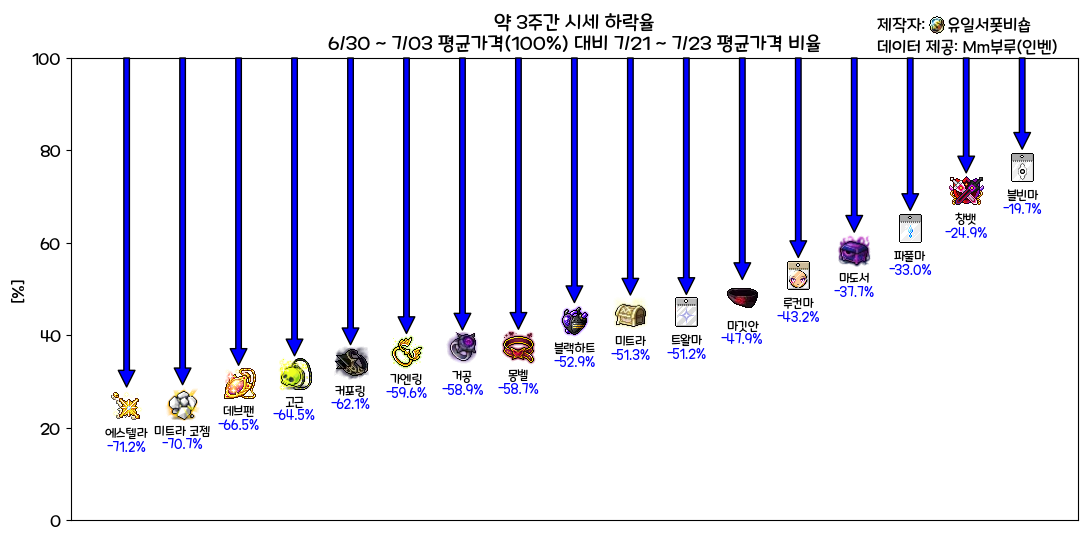

In [392]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot()
fontprop = fm.FontProperties(fname=fn_font, size=9)

for idx, name in enumerate(col_names):

    plt.annotate('', xytext=(idx, 100), xy=(idx, 100-values[idx]),
                arrowprops=dict(facecolor='blue', shrink=0))
    
    img = mpimg.imread(img_dict[name])
    imagebox = OffsetImage(img, zoom=0.7)  # zoom으로 크기 조절
    ab = AnnotationBbox(imagebox, (idx, 100 - values[idx]-4),  # x=105% 오른쪽, y=50% 중간
                        
                        frameon=False)
    ax.add_artist(ab)
    ax.text(idx, 100 - values[idx]-10, f'{name}', fontproperties=fontprop, va='center', ha='center')
    ax.text(idx, 100 - values[idx]-13, f'-{values[idx]:.1f}%', fontproperties=fontprop, va='center', ha='center', color='blue')
plt.ylim(0, 100)
plt.xlim(-1, 17)
ax.set_title(f'약 3주간 시세 하락율\n6/30 ~ 7/03 평균가격(100%) 대비 7/21 ~ 7/23 평균가격 비율', fontproperties=fontprop_title)
plt.xticks([])

fontprop = fm.FontProperties(fname=fn_font, size=12)
ax.set_yticks(range(0, 101, 20))
ax.set_yticklabels(range(0, 101, 20), fontproperties=fontprop)
ax.set_ylabel('[%]', fontproperties=fontprop)
img = mpimg.imread(r'C:\Users\zerot\Desktop\python\maple_API\data\server_img\scania.png')
imagebox = OffsetImage(img, zoom=0.70)  # zoom으로 크기 조절
ab = AnnotationBbox(imagebox, (0.860, 1.071),  # x=105% 오른쪽, y=50% 중간
                    xycoords='axes fraction',
                    frameon=False)
ax.add_artist(ab)
ax.text(0.80, 1.07, "제작자:     유일서폿비숍", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);
ax.text(0.80, 1.02, "데이터 제공: Mm부루(인벤)", transform=ax.transAxes,
        va='center', ha='left', fontproperties=fontprop);

plt.show()
# cond1 = (df['date'] >= '2025-06-30') & (df['date'] <= '2025-07-03')
# cond2 = (df['date'] >= '2025-07-21') & (df['date'] < '2025-07-24')
